<a href="https://colab.research.google.com/github/NuwanKeshara/Handwritten-Digit-Classification-Model/blob/main/DigitClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from keras.datasets import mnist
data = mnist.load_data()

In [85]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [86]:
#distribute data into training and testing sets
((x_train,y_train),(x_test,y_test)) = data


In [66]:
#shape of the dataset
x_train.shape

(60000, 28, 28)

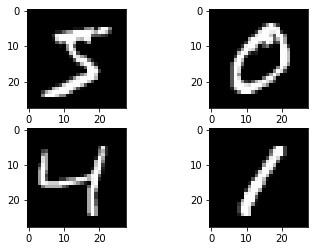

In [67]:
#visualize the training data
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2],cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3],cmap=plt.get_cmap('gray'))
plt.show()

In [68]:
#size of the training data
x_train.size

47040000

In [69]:
#shape of the image
x_train[0].shape

(28, 28)

In [87]:
#reshape the data
x_train = x_train.reshape((x_train.shape[0],28*28)).astype('float32')
x_test = x_test.reshape((x_test.shape[0],28*28)).astype('float32')

In [71]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [88]:
#Normalize the dataset 0-225 to 0-1
x_train = x_train/225
x_test = x_test/225


In [ ]:
print(x_train[0])
#print(x_test[0])

In [74]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [75]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [89]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)


In [77]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [78]:
y_train.shape

(60000, 10)

In [90]:
from keras.models import Sequential
from keras.layers import Dense

#define model
model = Sequential()

#first hidden layer
model.add(Dense(32,input_dim=28*28,activation='relu'))

#second hidden layer 
model.add(Dense(64,activation='relu'))

#output layer
model.add(Dense(10,activation='softmax'))

#compile
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [91]:
#model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [92]:
#train model
model.fit(x_train,y_train,epochs=10,batch_size=100)

Epoch 1/10
600/600 [==============================] - 7s 2ms/step - loss: 0.7407 - accuracy: 0.7904
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2035 - accuracy: 0.9416
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1516 - accuracy: 0.9553
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1244 - accuracy: 0.9640
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1033 - accuracy: 0.9688
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9723
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9749
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9780
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0635 - accuracy: 0.9805
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0587 - accuracy: 0.9813

In [93]:
#evaluate the model
scores = model.evaluate(x_test,y_test)
scores

313/313 [==============================] - 1s 1ms/step - loss: 0.0951 - accuracy: 0.9716


[0.09512124955654144, 0.9715999960899353]